In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
r = np.logspace(0,10,100)
r_rs = np.divide(r,100000)
rho = np.zeros(100)
for i in range(len(r_rs)):
    val = r_rs[i]
    rho[i]=1/(val*(1+val)**2)

Text(0.5, 1.0, 'Navarro-Frenk-White Profile')

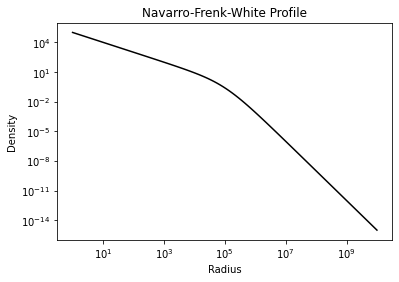

In [3]:
plt.plot(r, rho, c='k')
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Density")
plt.xlabel("Radius")
plt.title("Navarro-Frenk-White Profile")

In [4]:
from astropy.cosmology import LambdaCDM

In [5]:
cosmo=LambdaCDM(H0=72.0,Om0=0.3,Ode0=0.7)

In [34]:
z = np.arange(0,20,0.01)

In [35]:
x = cosmo.Om(z)

In [36]:
x = x-1

In [37]:
deltavir = (18*(np.pi**2) + 38*x - 39*x**2)/(x+1)

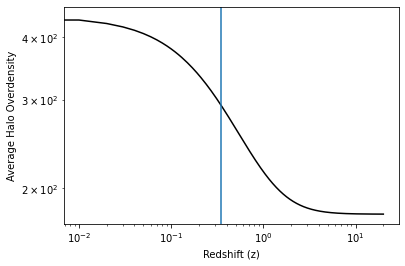

In [10]:
plt.plot(z, deltavir, c='k')
plt.yscale("log")
plt.ylabel("Average Halo Overdensity")
plt.xlabel("Redshift (z)")
plt.xscale("log")
plt.axvline(0.35)

In [11]:
def double_power_law(alpha, beta, gamma,ax):
    r = np.logspace(0,10,100)
    r_rs = np.divide(r,100000)
    rho = np.zeros(100)
    for i in range(len(r_rs)):
        val = r_rs[i]
        rho[i]=1/((val**gamma)*(1+(val**alpha))**((beta-gamma)/alpha))
    ax.plot(r, rho, c='k')
    
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel("Density")
    ax.set_xlabel("Radius")

Text(0.5, 1.0, 'NFW Profile')

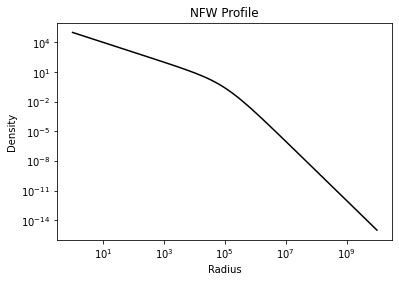

In [12]:
fig, ax = plt.subplots()
double_power_law(1,3,1, ax)
plt.title("NFW Profile")

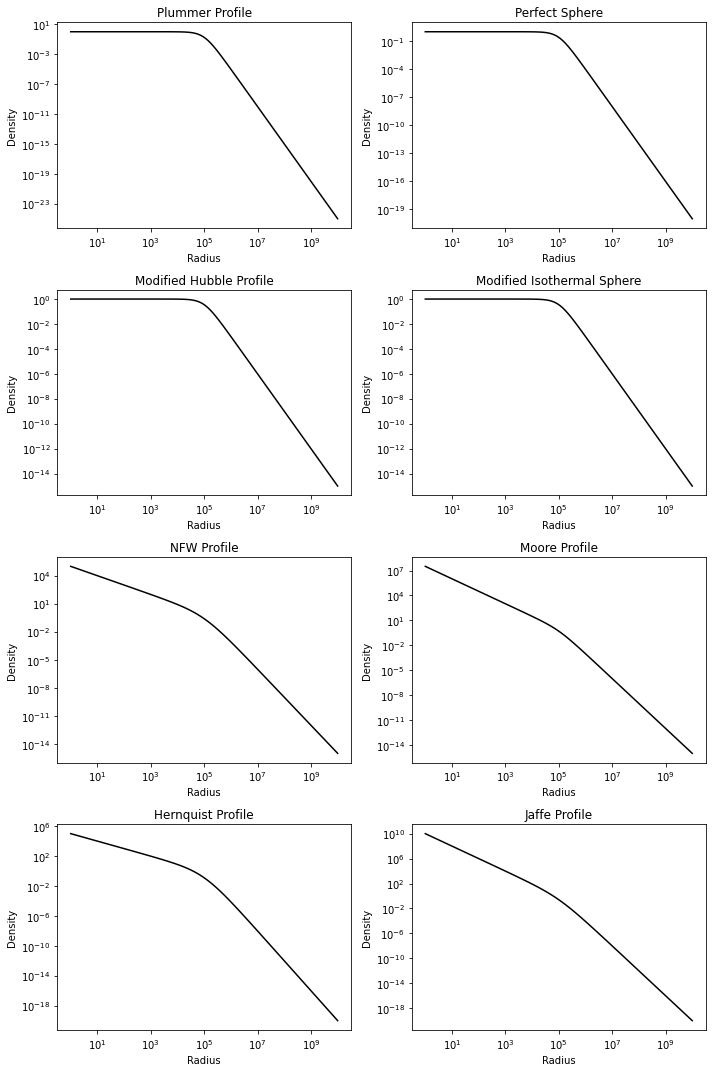

In [13]:
fig, ax = plt.subplots(4,2,figsize=(10,15))
names = np.array(["Plummer Profile","Perfect Sphere", "Modified Hubble Profile", "Modified Isothermal Sphere", "NFW Profile", "Moore Profile", "Hernquist Profile", "Jaffe Profile"]).reshape(4,2)
alphas = np.array([2,2,2,2,1,1.5,1,1]).reshape(4,2)
betas = np.array([5,4,3,3,3,3,4,4]).reshape(4,2)
gammas = np.array([0,0,0,0,1,1.5,1,2]).reshape(4,2)

for i in range(4):
    for j in range(2):
        double_power_law(alphas[i,j],betas[i,j],gammas[i,j],ax[i,j])
        ax[i,j].set_title(names[i,j])
        # print(i,j)

plt.tight_layout()

In [14]:
def einasto(alpha, c='k', label=None):
    r = np.logspace(0,10,100)
    r_rs = np.divide(r,1000000000)
    rho = np.zeros(100)
    for i in range(len(r_rs)):
        val = r_rs[i]
        # print(math.exp((-2/alpha)*((val)**alpha)-1))
        rho[i]=math.exp((-2/alpha)*((val)**alpha-1))
    line = plt.plot(r, rho, c=c, label=label)
    return line

In [15]:
import math

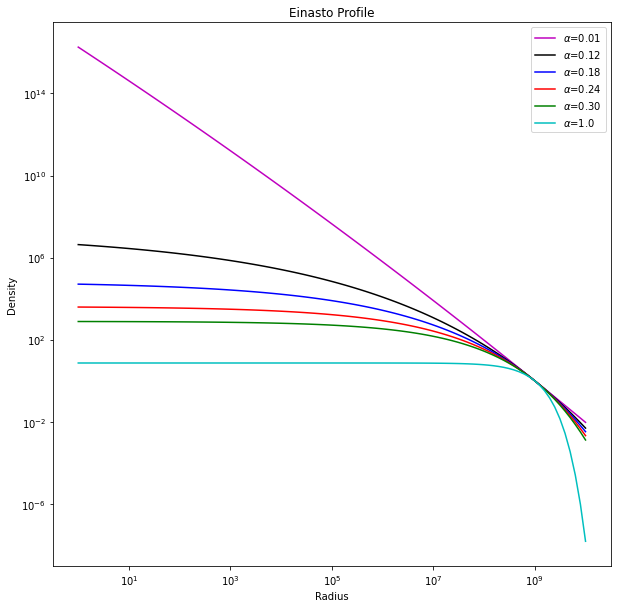

In [16]:
fig = plt.figure(figsize=(10,10))
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Density")
plt.xlabel("Radius")
plt.title("Einasto Profile")
f = einasto(0.01, 'm',r'$\alpha$=0.01')
a = einasto(0.12, 'k',r'$\alpha$=0.12')
b = einasto(0.18, 'b',r'$\alpha$=0.18')
c = einasto(0.24, 'r',r'$\alpha$=0.24')
d = einasto(0.30, 'g',r'$\alpha$=0.30')
e = einasto(1.0, 'c',r'$\alpha$=1.0')
plt.legend()

In [17]:
mm0 = np.logspace(-4,0,100)

In [18]:
mm0

array([1.00000000e-04, 1.09749877e-04, 1.20450354e-04, 1.32194115e-04,
       1.45082878e-04, 1.59228279e-04, 1.74752840e-04, 1.91791026e-04,
       2.10490414e-04, 2.31012970e-04, 2.53536449e-04, 2.78255940e-04,
       3.05385551e-04, 3.35160265e-04, 3.67837977e-04, 4.03701726e-04,
       4.43062146e-04, 4.86260158e-04, 5.33669923e-04, 5.85702082e-04,
       6.42807312e-04, 7.05480231e-04, 7.74263683e-04, 8.49753436e-04,
       9.32603347e-04, 1.02353102e-03, 1.12332403e-03, 1.23284674e-03,
       1.35304777e-03, 1.48496826e-03, 1.62975083e-03, 1.78864953e-03,
       1.96304065e-03, 2.15443469e-03, 2.36448941e-03, 2.59502421e-03,
       2.84803587e-03, 3.12571585e-03, 3.43046929e-03, 3.76493581e-03,
       4.13201240e-03, 4.53487851e-03, 4.97702356e-03, 5.46227722e-03,
       5.99484250e-03, 6.57933225e-03, 7.22080902e-03, 7.92482898e-03,
       8.69749003e-03, 9.54548457e-03, 1.04761575e-02, 1.14975700e-02,
       1.26185688e-02, 1.38488637e-02, 1.51991108e-02, 1.66810054e-02,
      

In [19]:
dndln = np.zeros(100)

In [20]:
for i in range(len(dndln)):
    dndln[i] = (mm0[i]/0.3)**-0.9 * math.exp(-1*mm0[i]/0.3)

Text(0.5, 1.0, 'Subhalo Mass Function')

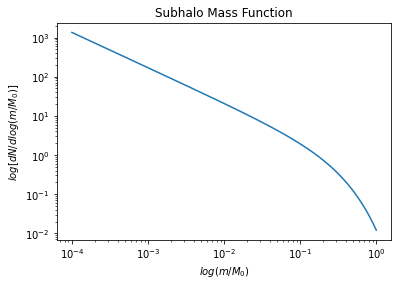

In [21]:
plt.plot(mm0,dndln)
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$log[dN/dlog(m/M_{0})]$')
plt.xlabel(r'$log(m/M_{0})$')
plt.title('Subhalo Mass Function')